In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations
lat = np.random.uniform(low=-90.00,high=90.00,size=1500)
lngs = np.random.uniform(low=-180.00,high=180.00,size=1500)
lat_lngs = zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm enough were counted
len(cities)

591

In [5]:
import requests
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87a037a627de8d5de46e326cbf3bcdfb&q=Boston


In [8]:
# Make a 'get' request for the city weather of boston
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Get the text of the 'Get' request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":84.85,"feels_like":85.12,"temp_min":77.95,"temp_max":89.62,"pressure":1009,"humidity":45},"visibility":10000,"wind":{"speed":17.27,"deg":200},"clouds":{"all":75},"dt":1657571715,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1657531046,"sunset":1657585298},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the json text of the 'Get' request
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 84.85,
  'feels_like': 85.12,
  'temp_min': 77.95,
  'temp_max': 89.62,
  'pressure': 1009,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1657571715,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657531046,
  'sunset': 1657585298},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Test if we get JSON formatted data from the endpoint url we created
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code==200:
    print(f"City weather found.")
else:
    print(f"City weather not found.")
    

City weather not found.


In [12]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 84.85,
  'feels_like': 85.12,
  'temp_min': 77.95,
  'temp_max': 89.62,
  'pressure': 1009,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1657571715,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657531046,
  'sunset': 1657585298},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get json data
boston_data = city_weather.json()

In [14]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1657531046,
 'sunset': 1657585298}

In [15]:
boston_data['sys']['country']

'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 89.62 45 75 17.27


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 11, 20, 35, 15)

In [18]:
# import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning data retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):
    
    # Group cities into sets of 50 for logging purposes.
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count+=1
        time.sleep(60)
        
    # Create endpoint url for each city.
    city_url=url+"&q="+city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counter.
    record_count+=1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is encountered, skip the city.
    except:
        print("City not found. Going to next...")
        pass
    
# Indicate that data loading is complete.
print('--------------------------------')
print('Data Retrieval completed.')
print('--------------------------------')
    

Beginning data retrieval   
---------------------------
Processing Record 1 of Set 1 | yarmouth
Processing Record 2 of Set 1 | bayeux
Processing Record 3 of Set 1 | lima
Processing Record 4 of Set 1 | petropavlovka
Processing Record 5 of Set 1 | lodja
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | avera
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | rizhao
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | viedma
Processing Record 21 of Set 1 | karratha
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | kulhudhuffushi
Proces

Processing Record 190 of Set 4 | shirokiy
Processing Record 191 of Set 4 | komsomolskiy
Processing Record 192 of Set 4 | nishihara
Processing Record 193 of Set 4 | mecca
Processing Record 194 of Set 4 | palabuhanratu
City not found. Going to next...
Processing Record 195 of Set 4 | college
Processing Record 196 of Set 4 | loa janan
Processing Record 197 of Set 4 | talnakh
Processing Record 198 of Set 4 | linguere
Processing Record 199 of Set 4 | cherskiy
Processing Record 200 of Set 4 | comodoro rivadavia
Processing Record 201 of Set 4 | tual
Processing Record 202 of Set 4 | pisco
Processing Record 203 of Set 4 | bengkulu
Processing Record 205 of Set 5 | amderma
City not found. Going to next...
Processing Record 206 of Set 5 | naze
Processing Record 207 of Set 5 | bethel
Processing Record 208 of Set 5 | lincoln
Processing Record 209 of Set 5 | sao felix do xingu
Processing Record 210 of Set 5 | attawapiskat
City not found. Going to next...
Processing Record 211 of Set 5 | matara
Proces

Processing Record 374 of Set 8 | california city
Processing Record 375 of Set 8 | brigantine
Processing Record 376 of Set 8 | baiyin
Processing Record 377 of Set 8 | pokaran
Processing Record 378 of Set 8 | caravelas
Processing Record 379 of Set 8 | clarence town
Processing Record 380 of Set 8 | flin flon
Processing Record 381 of Set 8 | cururupu
Processing Record 382 of Set 8 | ilulissat
Processing Record 383 of Set 8 | bristol
Processing Record 384 of Set 8 | copacabana
Processing Record 385 of Set 8 | pacet
Processing Record 386 of Set 8 | sitka
Processing Record 387 of Set 8 | sapele
Processing Record 388 of Set 8 | along
Processing Record 389 of Set 8 | nizwa
Processing Record 390 of Set 8 | olafsvik
Processing Record 391 of Set 8 | lukulu
Processing Record 392 of Set 8 | cabedelo
Processing Record 393 of Set 8 | nanortalik
Processing Record 394 of Set 8 | port macquarie
Processing Record 395 of Set 8 | alihe
Processing Record 396 of Set 8 | bam
Processing Record 397 of Set 8 | ku

Processing Record 557 of Set 11 | rodrigues alves
Processing Record 558 of Set 11 | marfino
Processing Record 559 of Set 11 | vila velha
Processing Record 560 of Set 11 | tigil
Processing Record 562 of Set 12 | fengzhen
Processing Record 563 of Set 12 | ndende
Processing Record 564 of Set 12 | san salvo
Processing Record 565 of Set 12 | sumbawanga
Processing Record 566 of Set 12 | wattegama
Processing Record 567 of Set 12 | obihiro
Processing Record 568 of Set 12 | waynesboro
Processing Record 569 of Set 12 | gravelbourg
Processing Record 570 of Set 12 | springdale
Processing Record 571 of Set 12 | sirsi
Processing Record 572 of Set 12 | litoral del san juan
City not found. Going to next...
Processing Record 573 of Set 12 | roquetas de mar
Processing Record 574 of Set 12 | puga
Processing Record 575 of Set 12 | lebu
Processing Record 576 of Set 12 | katsuura
Processing Record 577 of Set 12 | te anau
Processing Record 578 of Set 12 | dunedin
Processing Record 579 of Set 12 | outlook
Pro

In [30]:
print(len(city_data))

543


In [31]:
# Convert the array of dictionaries to a Pandas dataframe.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yarmouth,41.7057,-70.2286,80.15,65,0,14.97,US,2022-07-11 20:35:55
1,Bayeux,-7.1250,-34.9322,79.43,73,0,8.05,BR,2022-07-11 20:35:56
2,Lima,-12.0432,-77.0282,64.90,74,100,5.75,PE,2022-07-11 20:33:07
3,Petropavlovka,50.6114,105.3196,52.29,89,100,4.18,RU,2022-07-11 20:35:56
4,Lodja,-3.4833,23.4333,78.80,31,56,2.01,CD,2022-07-11 20:35:56
5,Port Alfred,-33.5906,26.8910,57.72,81,0,9.51,ZA,2022-07-11 20:35:57
6,Cayenne,4.9333,-52.3333,82.44,1,57,5.75,GF,2022-07-11 20:35:46
7,Avera,33.1940,-82.5271,80.65,56,97,6.11,US,2022-07-11 20:35:57
8,Cape Town,-33.9258,18.4232,55.11,92,75,9.22,ZA,2022-07-11 20:33:25
9,Carnarvon,-24.8667,113.6333,63.43,54,0,9.73,AU,2022-07-11 20:31:03


In [32]:
# Create the output file (CSV)
output_data_file='weather_data/cities.csv'

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [33]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

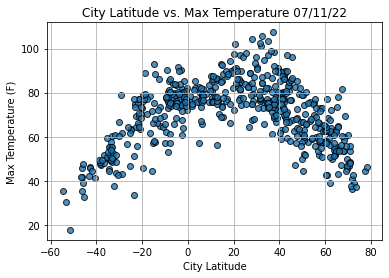

In [34]:
# Import time module
import time

# Build the scatterplot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show plot
plt.show()

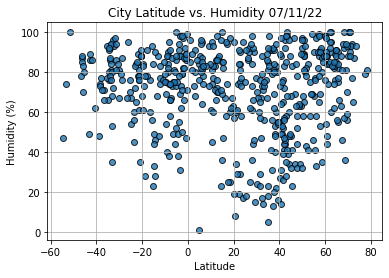

In [35]:
# Build the scatterplot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

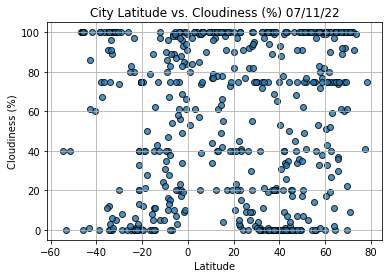

In [36]:
# Build the scatterplot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

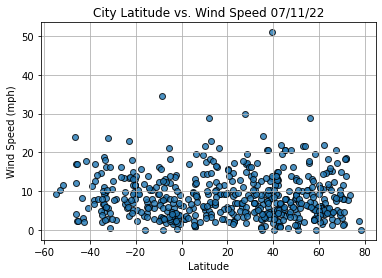

In [37]:
# Build the scatterplot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot its regression line and equation.
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the line's equation.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter and plot the line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13=city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    35.22
Humidity                       47
Cloudiness                     40
Wind Speed                   9.22
Country                        AR
Date          2022-07-11 20:35:58
Name: 13, dtype: object

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yarmouth,41.7057,-70.2286,80.15,65,0,14.97,US,2022-07-11 20:35:55
3,Petropavlovka,50.6114,105.3196,52.29,89,100,4.18,RU,2022-07-11 20:35:56
6,Cayenne,4.9333,-52.3333,82.44,1,57,5.75,GF,2022-07-11 20:35:46
7,Avera,33.1940,-82.5271,80.65,56,97,6.11,US,2022-07-11 20:35:57
10,Rizhao,35.4275,119.4553,76.15,98,94,6.73,CN,2022-07-11 20:35:58


In [48]:
# Create northern and southern hemisphere dataframes.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

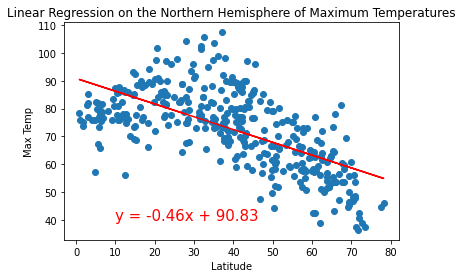

In [52]:
# Linear regression on the northern hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere of Maximum Temperatures', 'Max Temp',(10,40))

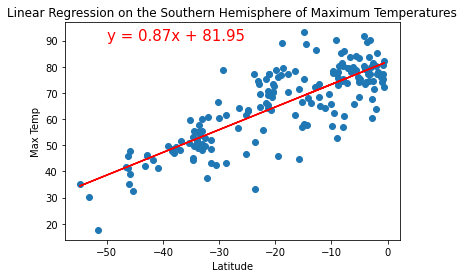

In [53]:
# Linear regression on the southern hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere of Maximum Temperatures', 'Max Temp',(-50,90))

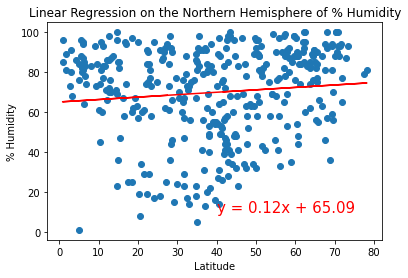

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere of % Humidity', '% Humidity',(40,10))

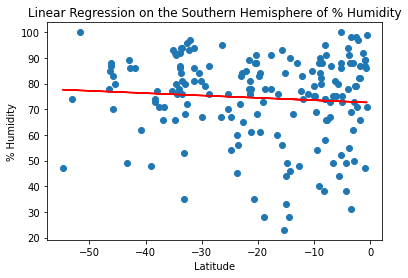

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere of % Humidity', '% Humidity',(-50,15))

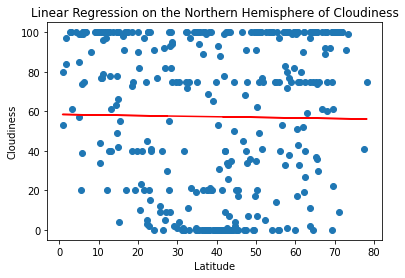

In [60]:
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere of Cloudiness','Cloudiness',(-50,60))

In [61]:
linregress(x_values,y_values)

LinregressResult(slope=-0.02969619159718038, intercept=58.439879787077714, rvalue=-0.014488221330989419, pvalue=0.7823619204934287, stderr=0.10742105343151066, intercept_stderr=4.718773649164269)

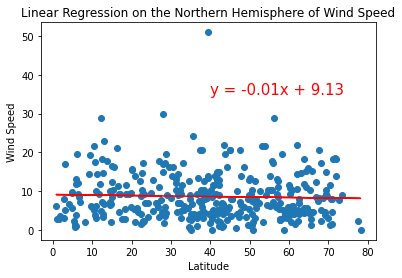

In [63]:
# Linear regression on the Northern Hemisphere for wind speeds
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere of Wind Speed', 'Wind Speed',(40,35))


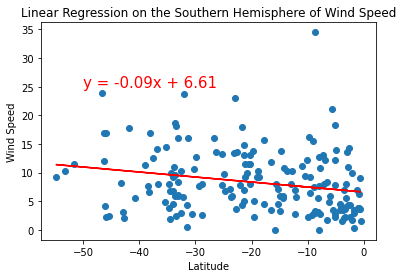

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere of Wind Speed', 'Wind Speed',(-50,25))